<a href="https://colab.research.google.com/github/inalee/2019_Deep-Learning-Course/blob/master/%EA%B0%80%EC%82%AC%20%EB%B6%84%EC%84%9D%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EA%B0%80%EC%82%AC_%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%B0%8F_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install konlpy

In [ ]:
import pandas as pd
import konlpy
from konlpy.tag import Komoran
from konlpy.tag import Okt
from konlpy.tag import Kkma
from itertools import chain
from gensim.models import Word2Vec

from keras import models
from keras import layers
from keras.layers import LSTM,Embedding,Bidirectional,CuDNNLSTM
from keras import optimizers

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
ballad = pd.read_csv("/content/drive/My Drive/딥러닝_가사_프로젝트/ballad.csv")

In [ ]:
ballad = ballad[:5000]
ballad["konlpy"] = ""
ballad["konlpy"] = ballad.lyric.map(lambda x: Okt().pos(x)) # 모든 글자 pos tag 달기
ballad["konlpy"] = ballad.konlpy.map(lambda x: list(chain.from_iterable(x))) # tuple 형태 flatten 해서 하나의 리스트로만 만들기

In [ ]:
ballad_final_list = []
for i in range(0,len(ballad.konlpy)):
    temp_list = []
    #print(ballad.konlpy[i])
    for j in range(0,len(ballad.konlpy[i])):
        # Noun / Verb / Adjective / Conjunction / Adverb (명사,동사,형용사,접속사,부사) 만 남기기 
        if ballad.konlpy[i][j]=="Noun": temp_list.append(ballad.konlpy[i][j-1])
        if ballad.konlpy[i][j]=="Verb": temp_list.append(ballad.konlpy[i][j-1])
        if ballad.konlpy[i][j]=="Adjective":  temp_list.append(ballad.konlpy[i][j-1])
        if ballad.konlpy[i][j]=="Conjunction":  temp_list.append(ballad.konlpy[i][j-1])
        if ballad.konlpy[i][j]=="Adverb": temp_list.append(ballad.konlpy[i][j-1])
    ballad_final_list.append(temp_list)

In [ ]:
# 한글자 단어 없애기
for i in ballad_final_list:
  for j in i:
    if len(j) == 1:
      i.remove(j)
      continue

In [ ]:
# 리스트 요소 0 인것(비어 있는것) 삭제하기
for i in ballad_final_list:
  if len(i) == 0:
    ballad_final_list.remove(i)

In [ ]:
ballad_songs =  []
for i in ballad_final_list:
    lyrics = " ".join(i)
    ballad_songs.append(lyrics)

In [ ]:
# ballad 최종 갯수 - 4955개 
len(ballad_songs)

4955

In [ ]:
trot = pd.read_csv("/content/drive/My Drive/딥러닝_가사_프로젝트/trot.csv")

In [ ]:
trot = trot[:5000]
trot["konlpy"] = ""

trot["konlpy"] = trot.lyric.map(lambda x: Okt().pos(x)) # 모든 글자 pos tag 달기
trot["konlpy"] = trot.konlpy.map(lambda x: list(chain.from_iterable(x))) # tuple 형태 flatten 해서 하나의 리스트로만 만들기

In [ ]:
trot_final_list = []
for i in range(0,len(trot.konlpy)):
    temp_list = []
    #print(trot.konlpy[i])
    for j in range(0,len(trot.konlpy[i])):
        # Noun / Verb / Adjective / Conjunction / Adverb (명사,동사,형용사,접속사,부사) 만 남기기 
        if trot.konlpy[i][j]=="Noun": temp_list.append(trot.konlpy[i][j-1])
        if trot.konlpy[i][j]=="Verb": temp_list.append(trot.konlpy[i][j-1])
        if trot.konlpy[i][j]=="Adjective":  temp_list.append(trot.konlpy[i][j-1])
        if trot.konlpy[i][j]=="Conjunction":  temp_list.append(trot.konlpy[i][j-1])
        if trot.konlpy[i][j]=="Adverb": temp_list.append(trot.konlpy[i][j-1])
    trot_final_list.append(temp_list)

In [ ]:
# 한글자 단어 없애기
for i in trot_final_list:
  for j in i:
    if len(j) == 1:
      i.remove(j)
      continue

In [ ]:
# 리스트 요소 0 인것(비어 있는것) 삭제하기
for i in trot_final_list:
  if len(i) == 0:
    trot_final_list.remove(i)

In [ ]:
trot_songs =  []
for i in trot_final_list:
    lyrics = " ".join(i)
    trot_songs.append(lyrics)

In [ ]:
# 트로트 최종 갯수 - 4992개 
len(trot_songs)

4992

In [ ]:
dance = pd.read_csv("/content/drive/My Drive/딥러닝_가사_프로젝트/dance.csv")

In [ ]:
dance = dance[:5000]
dance["konlpy"] = ""
dance["lyric"] = dance.lyric.map(lambda x: x.replace("\n\t\t\t\t\t\t\t", ""))
dance["konlpy"] = dance.lyric.map(lambda x: Okt().pos(x)) # 모든 글자 pos tag 달기
dance["konlpy"] = dance.konlpy.map(lambda x: list(chain.from_iterable(x))) # tuple 형태 flatten 해서 하나의 리스트로만 만들기

In [ ]:
dance_final_list = []
for i in range(0,len(dance.konlpy)):
    temp_list = []
    for j in range(0,len(dance.konlpy[i])):
        # Noun / Verb / Adjective / Conjunction / Adverb (명사,동사,형용사,접속사,부사) 만 남기기 
        if dance.konlpy[i][j]=="Noun": temp_list.append(dance.konlpy[i][j-1])
        if dance.konlpy[i][j]=="Verb": temp_list.append(dance.konlpy[i][j-1])
        if dance.konlpy[i][j]=="Adjective":  temp_list.append(dance.konlpy[i][j-1])
        if dance.konlpy[i][j]=="Conjunction":  temp_list.append(dance.konlpy[i][j-1])
        if dance.konlpy[i][j]=="Adverb": temp_list.append(dance.konlpy[i][j-1])
    dance_final_list.append(temp_list)

In [ ]:
# 한글자 단어 없애기
for i in dance_final_list:
  for j in i:
    if len(j) == 1:
      i.remove(j)
      continue

In [ ]:
# 리스트 요소 0 인것(비어 있는것) 삭제하기
for i in dance_final_list:
  if len(i) == 0:
    dance_final_list.remove(i)

In [ ]:
dance_songs =  []
for i in dance_final_list:
    lyrics = " ".join(i)
    dance_songs.append(lyrics)

In [ ]:
# 댄스 최종 갯수 - 4958개
len(dance_songs)

4958

## -------- embedding 모델 불러오기  --------


In [ ]:
embedding_model = Word2Vec.load("/content/drive/My Drive/딥러닝_가사_프로젝트/embedding_model_v3.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
total_songs = ballad_songs[:4500]+trot_songs[:4500]+dance_songs[:4500] #dance / trot / ballad 모두 합치기 (for train / validation dataset)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

maxlen = 100  #한곡 당 최대 100개의 단어 포함하게 만들기 
max_words = 7000 #  top 7000 words in the dataset

tokenizer = Tokenizer(num_words=max_words) 
tokenizer.fit_on_texts(total_songs)
sequences = tokenizer.texts_to_sequences(total_songs)
total_sequences = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
# 사전학습된 word2vec 과 기존 데이터를 바탕으로 시퀀스화된 word index dictionary 숫자 맞춰주기.
import numpy as np
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if word in embedding_model.wv.index2entity:
    embedding_vector = embedding_model.wv.word_vec(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [ ]:
ballad_train = total_sequences[:3500]
ballad_valid = total_sequences[3500:4500]

trot_train = total_sequences[4500:8000]
trot_valid = total_sequences[8000:9000]

dance_train = total_sequences[9000:12500]
dance_valid = total_sequences[12500:13500]

In [ ]:
print("+++++++ ballad ++++++++++")
print(len(ballad_train))
print(len(ballad_valid))
print("++++++++ trot +++++++++")
print(len(trot_train))
print(len(trot_valid))
print("++++++++ dance +++++++++")
print(len(dance_train))
print(len(dance_valid))

+++++++ ballad ++++++++++
3500
1000
++++++++ trot +++++++++
3500
1000
++++++++ dance +++++++++
3500
1000


### ballad VS dacne

In [ ]:
# 발라드+댄스 데이터 합치기(train/valid)
ballad_dance_train = np.concatenate((ballad_train, dance_train), axis = 0)
ballad_dance_valid = np.concatenate((ballad_valid, dance_valid), axis = 0)

# test dataset 시퀀스화
ballad_dance_test = ballad_songs[4500:]+dance_songs[4500:]
test_sequences = tokenizer.texts_to_sequences(ballad_dance_test)
ballad_dance_test = pad_sequences(test_sequences, maxlen=maxlen)

In [ ]:
# 발라드+댄스 target 데이터 만들기
ballad_dance_train_target = []
for i in range(3500): ## 0~3499 : 0 (발라드)
    ballad_dance_train_target.append(0) 
for i in range(3500):
    ballad_dance_train_target.append(1)   ## 3500~7000: 1 (댄스)
 
ballad_dance_valid_target = []
for i in range(1000):
    ballad_dance_valid_target.append(0)   
for i in range(1000):
    ballad_dance_valid_target.append(1)   

ballad_dance_test_target = []
for i in range(455):
    ballad_dance_test_target.append(0)   
for i in range(458):
    ballad_dance_test_target.append(1)   

**오버피팅된 모델**

In [ ]:
model = models.Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix],trainable=False))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(16))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.005), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 100, 100)          500000    
_________________________________________________________________
lstm_25 (LSTM)               (None, 100, 128)          117248    
_________________________________________________________________
lstm_26 (LSTM)               (None, 100, 64)           49408     
_________________________________________________________________
lstm_27 (LSTM)               (None, 16)                5184      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 17        
Total params: 671,857
Trainable params: 171,857
Non-trainable params: 500,000
_________________________________________________________________


In [ ]:
history = model.fit(ballad_dance_train,ballad_dance_train_target,
                    validation_data=(ballad_dance_valid,ballad_dance_valid_target),
                    epochs=50, batch_size=256)

Train on 7000 samples, validate on 2000 samples
Epoch 1/50
7000/7000 [==============================] - 26s 4ms/step - loss: 0.6221 - acc: 0.6636 - val_loss: 0.5808 - val_acc: 0.7210
Epoch 2/50
7000/7000 [==============================] - 13s 2ms/step - loss: 0.5033 - acc: 0.7703 - val_loss: 0.5030 - val_acc: 0.7610
Epoch 3/50
7000/7000 [==============================] - 13s 2ms/step - loss: 0.4471 - acc: 0.8004 - val_loss: 0.4781 - val_acc: 0.7755
Epoch 4/50
7000/7000 [==============================] - 13s 2ms/step - loss: 0.3946 - acc: 0.8239 - val_loss: 0.4632 - val_acc: 0.7800
Epoch 5/50
7000/7000 [==============================] - 13s 2ms/step - loss: 0.3621 - acc: 0.8477 - val_loss: 0.4766 - val_acc: 0.7435
Epoch 6/50
7000/7000 [==============================] - 13s 2ms/step - loss: 0.3420 - acc: 0.8520 - val_loss: 0.4287 - val_acc: 0.8185
Epoch 7/50
7000/7000 [==============================] - 13s 2ms/step - loss: 0.2956 - acc: 0.8781 - val_loss: 0.4549 - val_acc: 0.8160
Epoch 8

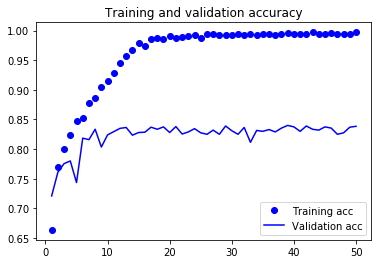

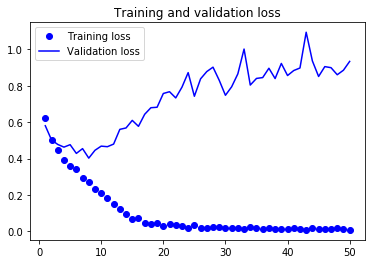

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**파라미터 튜닝 후 개선된 모델**

In [ ]:
model2 = models.Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix],trainable=False))
model2.add(layers.Dropout(0.5))
model2.add(LSTM(64,return_sequences=True))
model2.add(LSTM(64,return_sequences=True))
model2.add(LSTM(16))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer=optimizers.RMSprop(lr=0.0001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 100, 100)          500000    
_________________________________________________________________
dropout_34 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 100, 64)           42240     
_________________________________________________________________
lstm_23 (LSTM)               (None, 100, 64)           33024     
_________________________________________________________________
lstm_24 (LSTM)               (None, 16)                5184      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 580,465
Trainable params: 80,465
Non-trainable params: 500,000
__________________________________________

In [ ]:
history2 = model2.fit(ballad_dance_train,ballad_dance_train_target,
                    validation_data=(ballad_dance_valid,ballad_dance_valid_target),
                    epochs=50, batch_size=512)

Train on 7000 samples, validate on 2000 samples
Epoch 1/50
7000/7000 [==============================] - 19s 3ms/step - loss: 0.6863 - acc: 0.5646 - val_loss: 0.6717 - val_acc: 0.6330
Epoch 2/50
7000/7000 [==============================] - 6s 920us/step - loss: 0.6663 - acc: 0.6520 - val_loss: 0.6475 - val_acc: 0.6715
Epoch 3/50
7000/7000 [==============================] - 6s 905us/step - loss: 0.6423 - acc: 0.6836 - val_loss: 0.6174 - val_acc: 0.7050
Epoch 4/50
7000/7000 [==============================] - 6s 901us/step - loss: 0.6121 - acc: 0.7139 - val_loss: 0.5844 - val_acc: 0.7205
Epoch 5/50
7000/7000 [==============================] - 6s 916us/step - loss: 0.5806 - acc: 0.7251 - val_loss: 0.5575 - val_acc: 0.7305
Epoch 6/50
7000/7000 [==============================] - 6s 918us/step - loss: 0.5498 - acc: 0.7389 - val_loss: 0.5394 - val_acc: 0.7360
Epoch 7/50
7000/7000 [==============================] - 6s 899us/step - loss: 0.5273 - acc: 0.7551 - val_loss: 0.5307 - val_acc: 0.7420
E

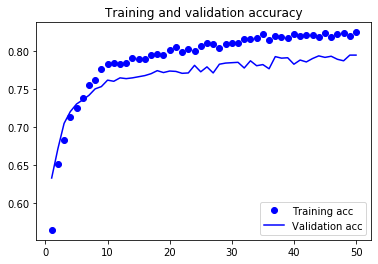

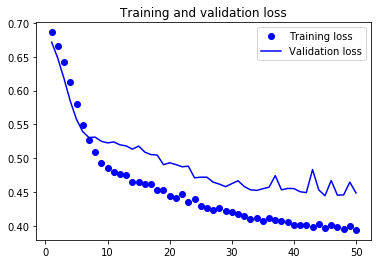

In [ ]:
import matplotlib.pyplot as plt

acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model2.evaluate(ballad_dance_test,ballad_dance_test_target)

913/913 [==============================] - 5s 5ms/step


[0.4782124213294941, 0.768893757171986]

## dance vs trot vs ballad

In [ ]:
# dance+ballad+trot 데이터 합치기(train/valid)
all_train = np.concatenate((np.concatenate((ballad_train, dance_train), axis = 0),trot_train),axis=0)
all_valid = np.concatenate((np.concatenate((ballad_valid, dance_valid), axis = 0),trot_valid),axis=0)

# dance+ballad+trot test 데이터 시퀀스화
all_test = ballad_songs[4500:]+dance_songs[4500:]+trot_songs[4500:]
test_sequences = tokenizer.texts_to_sequences(all_test)
all_test = pad_sequences(test_sequences, maxlen=maxlen)

In [ ]:
# target 변수 만들기

all_train_target = []
for i in range(3500): ## 0~3499 : 0 (발라드)
    all_train_target.append(0) 
for i in range(3500):
    all_train_target.append(1)   ## 3500~6999: 1 (댄스)
for i in range(3500):
    all_train_target.append(2)   ## 7000~ : 2 (트로트)
 
all_valid_target = []
for i in range(1000):
    all_valid_target.append(0)   
for i in range(1000):
    all_valid_target.append(1)   
for i in range(1000):
    all_valid_target.append(2)   


all_test_target = []
for i in range(455):
    all_test_target.append(0)   
for i in range(458):
    all_test_target.append(1)   
for i in range(492):
    all_test_target.append(2)  

In [ ]:
from keras.utils.np_utils import to_categorical
# target변수 one-hot
one_hot_train_labels = to_categorical(all_train_target)
one_hot_valid_labels = to_categorical(all_valid_target)
one_hot_test_labels = to_categorical(all_test_target)

**오버피팅된 모델**

In [ ]:
model3 = models.Sequential()
model3.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix],trainable=False))
model3.add(LSTM(128,return_sequences=True))
model3.add(LSTM(64,return_sequences=True))
model3.add(LSTM(16))
model3.add(layers.Dense(3, activation='sigmoid'))

model3.compile(optimizer=optimizers.RMSprop(lr=0.005), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(all_train,one_hot_train_labels,
                    validation_data=(all_valid,one_hot_valid_labels),
                    epochs=50, batch_size=256)

Train on 10500 samples, validate on 3000 samples
Epoch 1/50
10500/10500 [==============================] - 35s 3ms/step - loss: 0.5143 - acc: 0.7392 - val_loss: 0.6391 - val_acc: 0.6977
Epoch 2/50
10500/10500 [==============================] - 20s 2ms/step - loss: 0.3804 - acc: 0.8320 - val_loss: 0.5277 - val_acc: 0.7728
Epoch 3/50
10500/10500 [==============================] - 20s 2ms/step - loss: 0.3432 - acc: 0.8518 - val_loss: 0.3562 - val_acc: 0.8480
Epoch 4/50
10500/10500 [==============================] - 21s 2ms/step - loss: 0.3179 - acc: 0.8647 - val_loss: 0.3645 - val_acc: 0.8380
Epoch 5/50
10500/10500 [==============================] - 20s 2ms/step - loss: 0.2945 - acc: 0.8730 - val_loss: 0.3694 - val_acc: 0.8461
Epoch 6/50
10500/10500 [==============================] - 20s 2ms/step - loss: 0.2740 - acc: 0.8844 - val_loss: 0.4100 - val_acc: 0.7796
Epoch 7/50
10500/10500 [==============================] - 20s 2ms/step - loss: 0.2609 - acc: 0.8905 - val_loss: 0.4786 - val_acc:

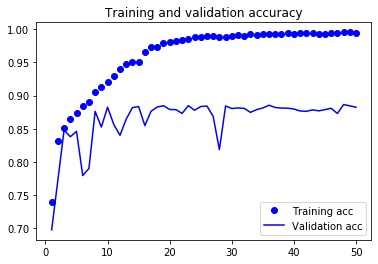

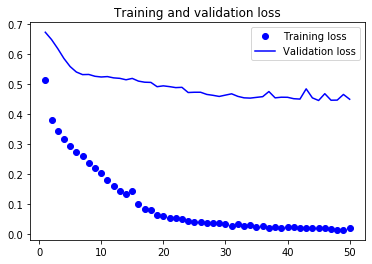

In [ ]:
import matplotlib.pyplot as plt

acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**튜닝 후 개선된 모델**

In [ ]:
model4 = models.Sequential()
model4.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix],trainable=False))
model4.add(layers.Dropout(0.5))
model4.add(LSTM(64,return_sequences=True))
model4.add(LSTM(64,return_sequences=True))
model4.add(LSTM(16))
model4.add(layers.Dense(3, activation='softmax'))

model4.compile(optimizer=optimizers.RMSprop(lr=0.0001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])m

In [ ]:
model4.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_45 (Embedding)     (None, 100, 100)          500000    
_________________________________________________________________
dropout_40 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 100, 64)           42240     
_________________________________________________________________
lstm_38 (LSTM)               (None, 100, 64)           33024     
_________________________________________________________________
lstm_39 (LSTM)               (None, 16)                5184      
_________________________________________________________________
dense_44 (Dense)             (None, 3)                 51        
Total params: 580,499
Trainable params: 80,499
Non-trainable params: 500,000
__________________________________________

In [ ]:
history4 = model4.fit(all_train,one_hot_train_labels,
                    validation_data=(all_valid,one_hot_valid_labels),
                    epochs=50, batch_size=512)

Train on 10500 samples, validate on 3000 samples
Epoch 1/50
10500/10500 [==============================] - 26s 2ms/step - loss: 1.0645 - acc: 0.4516 - val_loss: 1.0157 - val_acc: 0.5413
Epoch 2/50
10500/10500 [==============================] - 10s 911us/step - loss: 1.0020 - acc: 0.5596 - val_loss: 0.9413 - val_acc: 0.5930
Epoch 3/50
10500/10500 [==============================] - 10s 929us/step - loss: 0.9359 - acc: 0.6136 - val_loss: 0.8630 - val_acc: 0.6477
Epoch 4/50
10500/10500 [==============================] - 10s 911us/step - loss: 0.8651 - acc: 0.6578 - val_loss: 0.7935 - val_acc: 0.6890
Epoch 5/50
10500/10500 [==============================] - 10s 925us/step - loss: 0.7961 - acc: 0.6842 - val_loss: 0.7433 - val_acc: 0.6957
Epoch 6/50
10500/10500 [==============================] - 10s 914us/step - loss: 0.7471 - acc: 0.6950 - val_loss: 0.7111 - val_acc: 0.7073
Epoch 7/50
10500/10500 [==============================] - 10s 941us/step - loss: 0.7117 - acc: 0.7109 - val_loss: 0.688

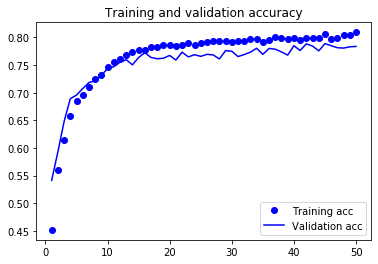

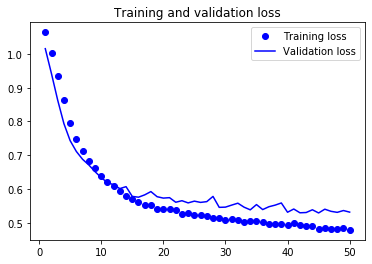

In [ ]:
import matplotlib.pyplot as plt

acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model4.evaluate(all_test,one_hot_test_labels)

1405/1405 [==============================] - 7s 5ms/step


[0.5782254726012831, 0.7608540926963834]